#### Quantum Computing: from Fundamentals to Applications - Summer School 2025
# Hands-on with Qiskit: Hello World - Qiskit Patterns

In this notebook you will walk through a Qiskit Patterns workflow, and use Qiskit's two  [primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives): the `Sampler` and the `Estimator`.

This tutorial partially involves content from [IBM Quantum Documentation: Hello World](https://docs.quantum.ibm.com/guides/hello-world).

# Table of Contents
1. [Install Qiskit](#install-qiskit)
2. [Set up your IBM Quantum Platform account](#setting-ibm-cloud)
3. [Build basic quantum circuits in Qiskit](#build-circuits)
4. [Create and run a simple quantum algorithm using the Qiskit pattern framework](qiskit-pattern)
5. [Run a program on a real device](real-device)


## Install Qiskit <a id="install-qiskit"></a>



You can use an online jupyter lab environment (see guide [Online lab environments](quantum.cloud.ibm.com/docs/en/guides/online-lab-environments)) or install Qiskit locally.

Follow the Qiskit installation guide [Install the Qiskit SDK and the Qiskit Runtime client](https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit) to complete the following steps:

	- Install Qiskit including the  extra visualization packages: `pip install qiskit[visualization]`

	- Install qiskit-ibm-runtime: `pip install qiskit-ibm-runtime`

	- Install jupyter: `pip install jupyter`

Check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version:

In [2]:
from platform import python_version

print(python_version())

3.13.2


If you need to upgrade Python and are unsure how to do it, please refer to this guide on how to upgrade Python depending on your OS: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)

In [ ]:
#%pip install qiskit[visualization]
#%pip install qiskit-ibm-runtime
#%pip install jupyter

### Make the necessary imports

Let's make the necessary imports for this tutorial.

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import qiskit_ibm_runtime
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from IPython.display import display, Latex


## Set up your IBM Quantum Platform account <a id="setting-ibm-cloud"></a>

In order to execute quantum circuits on real hardware, you will need an IBM Cloud account.

Follow the instructions in this guide [Set up your IBM Cloud account](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup) to complete the following steps:

1. Set up an IBM Cloud account if you do not already have one.
2. Log into or create an [IBM Quantum Platform](https://quantum.cloud.ibm.com/) account with an IBMid.
2. Access your IBM Quantum Platform dashboard, **create your API token**, and copy it to a secure location. (See first reference image below.)
3. In the code cell following the reference images, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the Instances page from the ☰ main menu and **create your instance**. If you are not part of a Network institution, choose the open plan. (See second reference image below.)
5. After the instance is created, copy its associated CRN code. (CRN stands for _Cloud Resource Names_) You may need to refresh to see the instance.
6.  In the code cell following the reference images, replace `deleteThisAndPasteYourCRNHere` with your CRN code.


 **Note:** Treat your API key as you would a secure password. Refer to the [Set up your IBM Cloud account](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.




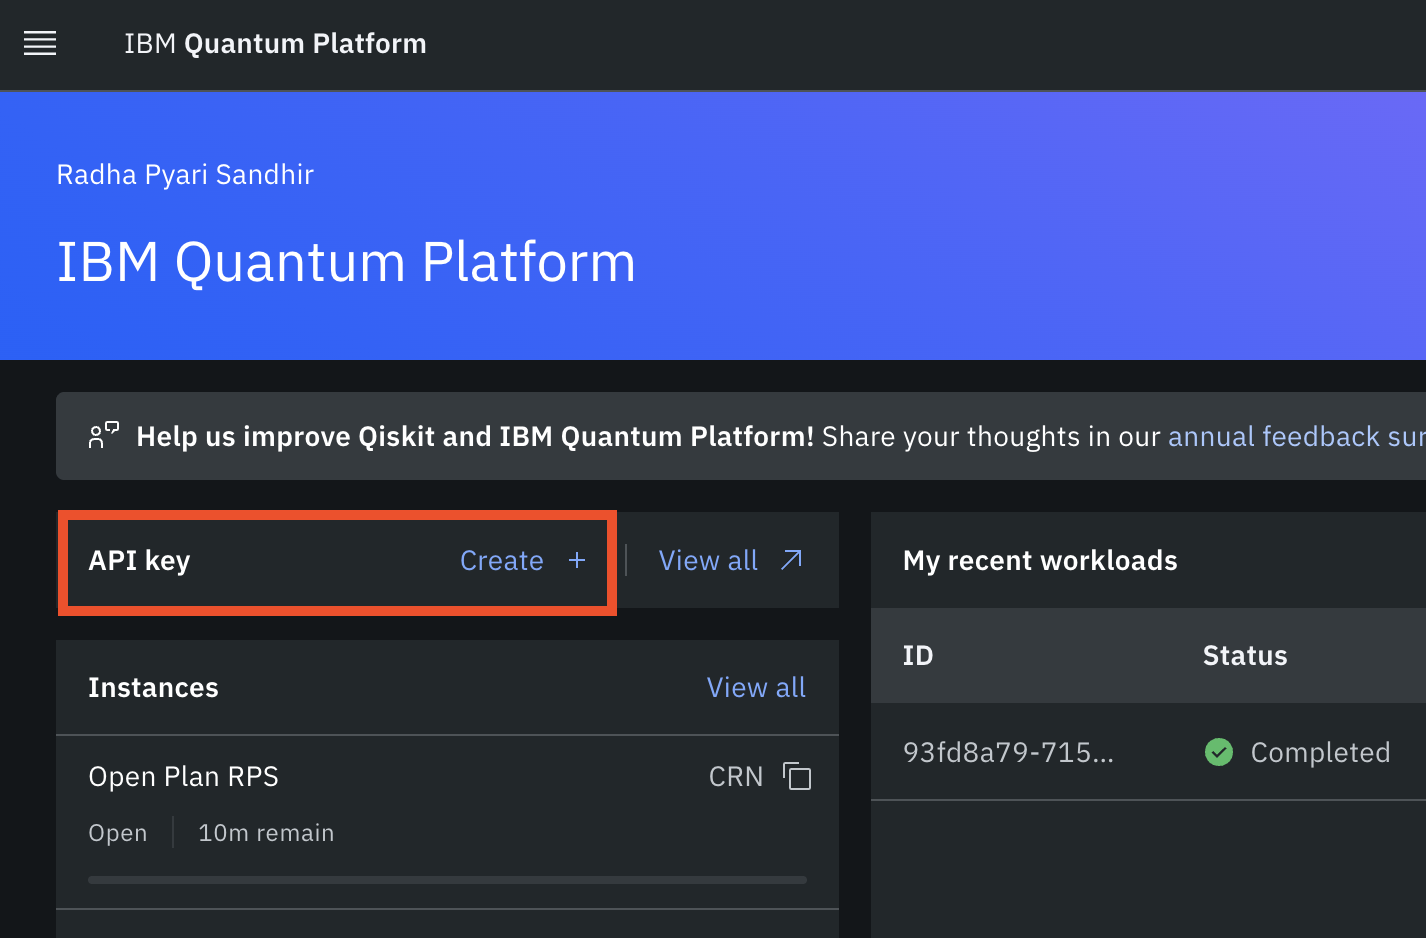

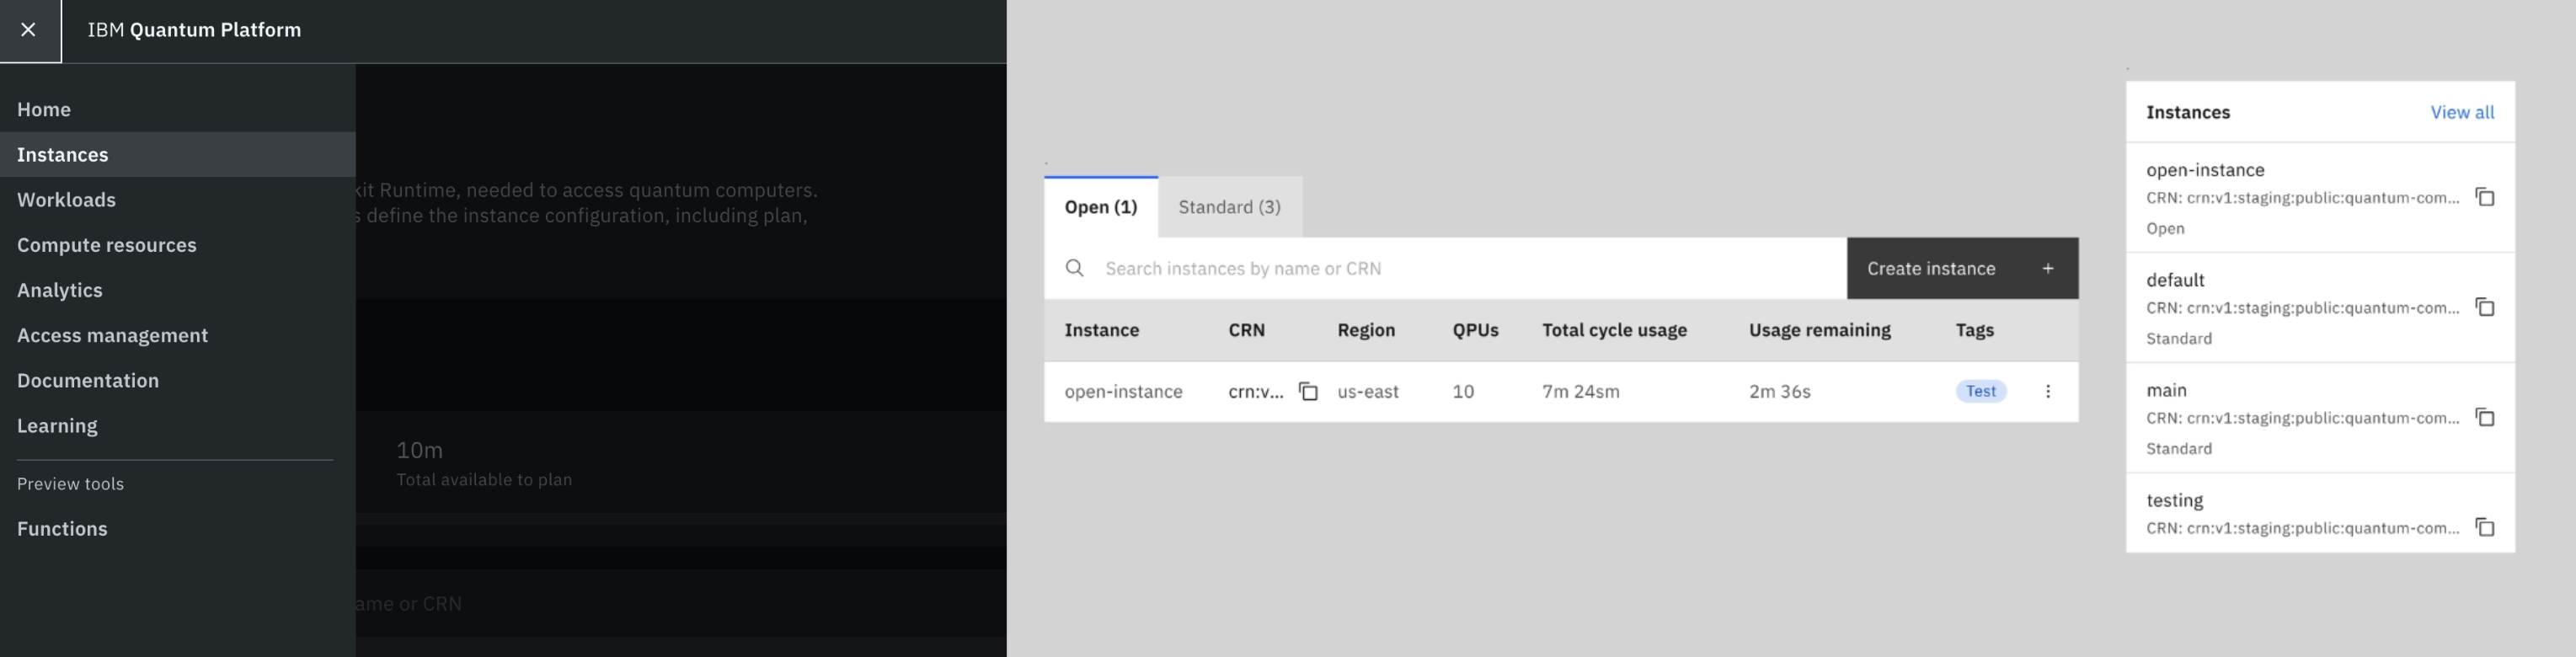

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Save your API key to access real devices

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"


QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key,
    instance=your_crn,
    set_as_default=True,
    overwrite=True,
)
'''


## Build basic quantum circuits in Qiskit <a id="build-circuits"></a>


Let's begin by building simple circuits with Qiskit.

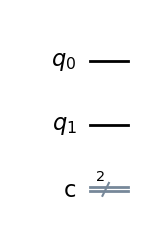

In [ ]:
# Simple quantum circuit with two qubits and two classical bits

# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2,2) 

# Draw the output using MatPlotLib
qc.draw(output='mpl')

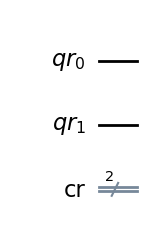

In [ ]:
# Quantum circuit with a Quantum Register named 'qr' that has two qubits, and a Classical Register named 'cr' with two classical bits

# Create a quantum register with 2 qubits, register label is 'qr'
qreg = QuantumRegister(2,'qr') 

# Create a classical register with 2 qubits, register label is 'cr'
creg = ClassicalRegister(2,'cr') 

# Create a quantum circuit with registers qreg and creg
qc = QuantumCircuit(qreg,creg) 

# Draw the quantum circuit
qc.draw(output='mpl') 

#### Quantum gates in Qiskit

**A note on bit numbering in Qiskit**

 Qiskit numbers the bits in a string from right to left. The Qiskit SDK uses the LSb 0 bit numbering. When displaying or interpreting a list of $n$ bits (or qubits) as a string, bit $n−1$ is the leftmost bit, and bit $0$ is the rightmost bit. This is because we usually write numbers with the most significant digit on the left, and in Qiskit, bit $n−1$ is interpreted as the most significant bit. For more details, see the [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering) topic.

This means certain gate representations may differ from those you learn in a textbook.

For instance, the controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

Because of the LSb 0 bit numbering, the matrix representation of $CX$ in Qiskit would be:

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
\end{pmatrix}$

**Exercise:** Try applying different combinations of gates on different qubits. Check out the [QuantumCircuit documentation](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit#methods-to-add-standard-instructions) for information on different gates.

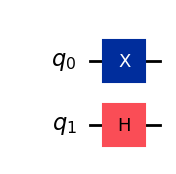

In [ ]:
qc = QuantumCircuit(2) 
# Apply X gate on qubit 0 
qc.x(0) 
# Apply CNOT gate where qubit 0 is the control qubit and qubit 1 is the target qubit
#qc.cx(0,1) 
# Apply a Hadamard gate on qubit 1
qc.h(1) 
# Add and remove more gates, refer to the Qiskit documentation for different gates
qc.draw(output='mpl') 

#qc.draw() # test draw without mpl
#options to save the circuit figure 
#qc.draw('mpl').savefig(‘name.png’, dpi=300)
#qc.draw('mpl').savefig(‘name.svg’)

The initial state of the quantum circuit is the $\ket{00}$ state.

The final state is:

In [ ]:
# Use Statevector to fetch the statevector of the circuit
sv = Statevector(qc)
sv.draw(output='latex')

<IPython.core.display.Latex object>

## Create and run a simple quantum algorithm using the Qiskit pattern framework <a id="qiskit-pattern"></a>


The Qiskit pattern conceptual framework can be considered the anatomy of a quantum algorithm.

The four steps to writing a quantum program using Qiskit patterns are:

1.  Map the problem to a quantum-native format.

2.  Optimize the circuits and operators.

3.  Execute using a Qiskit primitive function. 

4.  Analyze the results.

### Step 1. Map the problem to a quantum-native format

In a quantum program, *quantum circuits* are the native format in which to represent quantum instructions, and *operators* represent the observables to be measured. When creating a circuit, you'll usually create a new [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) object, then add instructions to it in sequence.


The following code cell creates a circuit that produces a *Bell state,* which is a state wherein two qubits are fully entangled with each other.

<div class="alert alert-success">

**Step 1** Create a circuit for the Bell state $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$

</div>


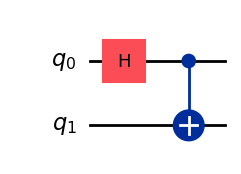

In [ ]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl") 


When creating quantum circuits, you must also consider what type of data you want returned after execution. Qiskit provides two ways to return data: you can obtain the expectation value of an observable, or you can obtain a probability distribution for a set of qubits you choose to measure. Prepare your workload to measure your circuit in one of these two ways with [Qiskit primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives).


- `Estimator` primitive - returns the expectation value of an observable
- `Sampler` primitive - returns a probability distribution for a set of qubits you choose to measure

<div class="alert alert-success">

**Step 1b - Estimator Primitive** Define the observables for which you want to calculate the expectation values

</div>

This example measures expectation values by using the `qiskit.quantum_info` submodule, which is specified by using operators (mathematical objects used to represent an action or process that changes a quantum state). The following code cell creates six two-qubit Pauli operators: `IZ`, `IX`, `ZI`, `XI`, `ZZ`, and `XX`.

As the Bell state is a maximally entangled state, we expect to see see non-zero expectation values for  `ZZ`, and `XX` -- indeed we expect an expectation value of 1 for this particular state for both of these observables. And an expectation value of 0 for `IZ`, `IX`, `ZI`, `XI`. 

This is a signature of entanglement, as neither qubit has definite individual properties. Measuring either qubit alone gives completely random results (+1 or -1 with equal probability).

In [36]:
# Set up six different observables.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels] # list of observables

<div class="alert alert-success">

**Step 1b - Sampler Primitive** Make a note to add measurement gates to the circuit

</div>

The `Sampler` samples the circuit and returns a probability distribution of measurement outcomes. This means we will need to add measurement gates to the circuit. 

Since the `Estimator` returns expectation values of observables, measurement gates would interfere with its functionality. Hence we will introduce measurement gates for the `Sampler` once we're done processing the circuit for `Estimator`.

### Step 2. Optimize the circuits for the target hardware

When executing circuits on a device, it is important to optimize the set of instructions that the circuit contains and minimize the overall depth (roughly the number of instructions) of the circuit. This ensures that you obtain the best results possible by reducing the effects of error and noise. Additionally, the circuit's instructions must conform to a backend device's [Instruction Set Architecture (ISA)](https://docs.quantum.ibm.com/guides/transpile#instruction-set-architecture) and must consider the device's basis gates and qubit connectivity.

The following code instantiates a simulator to submit a job to and transforms the circuit and observables to match that backend's ISA. Note that we will use a real device later.

In [41]:
# option: 
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2() 


In [42]:
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
    f"Native gate set: {backend.operation_names}\n"
)

#to view other properties you can use properties()
# refer to https://docs.quantum.ibm.com/guides/get-qpu-information
#backend.properties().to_dict()
#backend.properties().qubit_property(0)

#### Exercise: fetch and compare properties of other simulators FakeValenciaV2, FakeTorino, FakeBrisbane. Don't forget to import them.

Name: fake_almaden
Version: 2
No. of qubits: 20
Native gate set: ['delay', 'u1', 'cx', 'u3', 'u2', 'id', 'reset', 'measure']



<div class="alert alert-success">

**Step 2 - Estimator Primitive** Transpile the circuit into ISA circuit (ISA = Instruction Set Architecture)

</div>

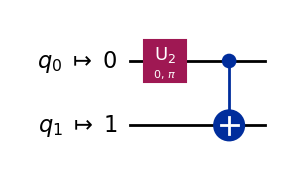

In [ ]:
# Creates an estimator using the selected backend
estimator = Estimator(backend) 

# Convert to an ISA circuit 
# Generate the pass manager, which is a list of transpiler passes grouped into a logical unit
pm_estimator = generate_preset_pass_manager(backend=backend, optimization_level=1) 

# Run the pass manager to create the ISA circuit 
isa_circuit_estimator = pm_estimator.run(qc) 

# Draw the circuit, note: idle_wires = False to hide all the qubits not being used
isa_circuit_estimator.draw("mpl", idle_wires=False) 

#### Exercise: Compare this with the ISA circuits for other backends and note the differences

<div class="alert alert-success">

**Step 2 - Sampler Primitive** Transpile the circuit into ISA circuit (ISA = Instruction Set Architecture)

</div>

But first add measurement gates to the circuit!

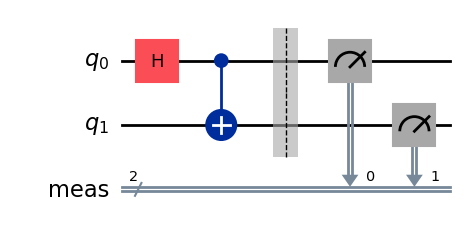

In [ ]:
# Use measure_all, which adds a barrier, applies measurement gates on all qubits, creates a classical register called `meas`
qc.measure_all() 
qc.draw('mpl')

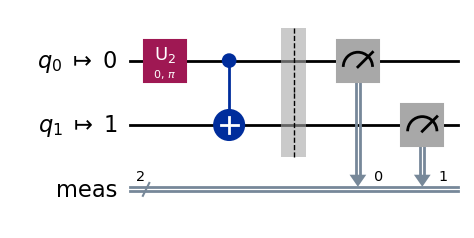

In [ ]:
# Create a sampler using the selected backend
sampler = Sampler(backend) 

# Convert to an ISA circuit
pm_sampler = generate_preset_pass_manager(backend=backend, optimization_level=1) 

isa_circuit_sampler = pm_sampler.run(qc) 


isa_circuit_sampler.draw("mpl", idle_wires=False) 

### Step 3. Execute using the Qiskit primitives

Quantum computers can produce random results, so you usually collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable by using the `Estimator` class. `Sampler` can be used to get data from a quantum computer.  These objects possess a `run()` method that executes the selection of circuits, observables, and parameters (if applicable), using a [primitive unified bloc (PUB).](https://docs.quantum.ibm.com/guides/primitive-input-output#pubs)



<div class="alert alert-success">

**Step 3 - Estimator Primitive** Submit a job using the Estimator primitive.

</div>

In [48]:
# Create layout-mapped observables for the ISA circuit

mapped_observables = [
    observable.apply_layout(isa_circuit_estimator.layout) for observable in observables
]

job_estimator = estimator.run([(isa_circuit_estimator, mapped_observables)])

# Result of the entire primitive execution. (You submitted one PUB, so this contains one inner result, and some metadata of its own.):

job_estimator_result = job_estimator.result()
 
# Result from your single PUB, which had six observables, so contains information on all six:
 
pub_result_estimator = job_estimator.result()[0]



<div class="alert alert-success">

**Step 3 - Sampler Primitive** Submit a job using the Sampler primitive.

</div>

In [ ]:
# Run the sampler primitive on ISA circuit for specified number of shots (1024)

job_sampler = sampler.run([isa_circuit_sampler], shots=1024) 

# Save the result of the job 

result_sampler = job_sampler.result() 

### Step 4. Post-process the results

This step involves postprocessing your results. You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem.  

- For the `Estimator`, we plot the values of the expecation values of the observables using `pyplot`
- For the `Sampler`, we plot the probability distribution obtained by sampling the quantum circuit as many times as the shots you specified using `plot_histogram`.

<div class="alert alert-success">

**Step 4 - Estimator Primitive** Visualize the results using `pyplot`

</div>

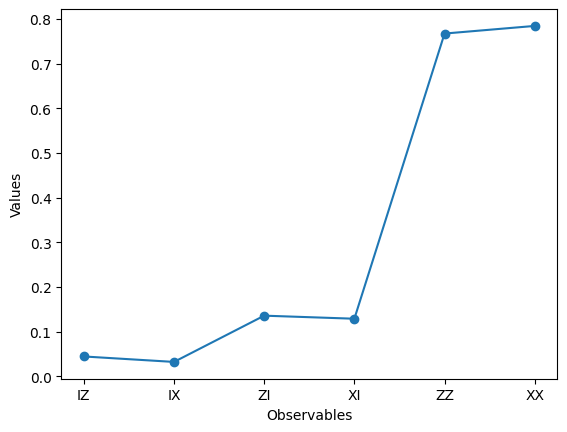

In [ ]:
# Plot the result
 
from matplotlib import pyplot as plt
 
# Extract values from the result 
values = pub_result_estimator.data.evs 

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

<div class="alert alert-success">

**Step 4 - Sampler Primitive** Visualize the results using `plot_histogram`

</div>

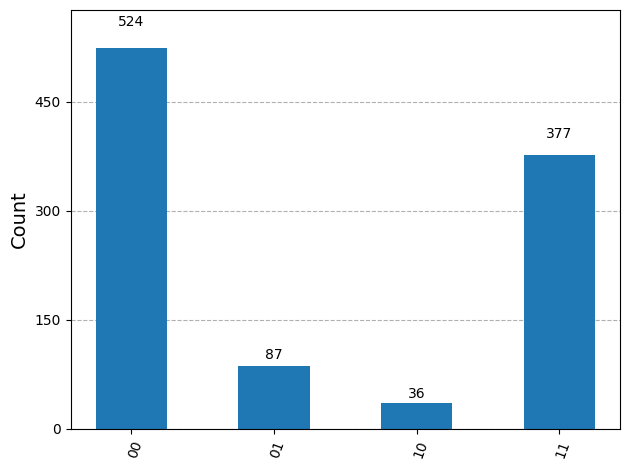

In [ ]:
from qiskit.visualization import plot_histogram

counts = result_sampler[0].data.meas.get_counts() 
# Note: meas is the default name of the classical register when using measure_all(). 
# If you specify a classical register, then use the name you assign

# Plot the result
plot_histogram(counts)


# Run a program on a real device <a id="real-device"></a>

 If you'd like to run this code on a real device, you can use the following code. This uses the `Sampler` primitive.

In order to run the `Estimator` primitive on a real device, refer to the code given in [IBM Quantum Documentation: Hello World](https://docs.quantum.ibm.com/guides/hello-world). Remember to create a new circuit without measurement gates.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# View the list of backends you have access to

service = QiskitRuntimeService()

service.backends()

[<IBMBackend('ibm_pinguino1')>,
 <IBMBackend('ibm_pinguino2')>,
 <IBMBackend('ibm_pinguino3')>,
 <IBMBackend('ibmq_dublin')>,
 <IBMBackend('test_eagle_us-east')>]

In [56]:
# Get backend
backend_real = service.least_busy(simulator=False, operational=True)

#backend_real = service.backend(name="insert_backend_name") # use this if you want to choose a specific backend 

sampler = Sampler(backend_real)

pm = generate_preset_pass_manager(backend=backend_real, optimization_level=3)
isa_circuit = pm.run(qc) 

job = sampler.run([isa_circuit], shots=1024)
result = job.result()

In [57]:
print(job.job_id)

<bound method BasePrimitiveJob.job_id of <RuntimeJobV2('d2qslhpolshc73bmin20', 'sampler')>>


In [58]:
print(
    f"Name: {backend_real.name}\n"
    f"Version: {backend_real.version}\n"
    f"No. of qubits: {backend_real.num_qubits}\n"
    f"Native gate set: {backend_real.operation_names}\n"
)

Name: ibm_pinguino2
Version: 2
No. of qubits: 127
Native gate set: ['sx', 'delay', 'measure', 'x', 'id', 'rz', 'reset', 'ecr']



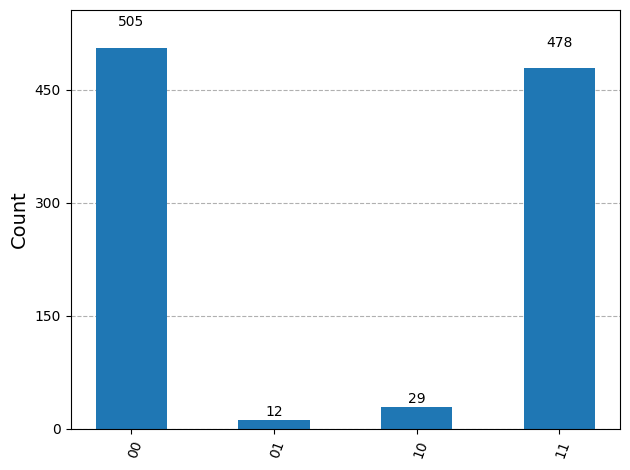

In [ ]:
counts = result[0].data.meas.get_counts() 

plot_histogram(counts)

### Fetching results from a completed job

The cell below demonstrates how you can fetch results from a completed job. Here are the details for this job example:

- Backend Name: ibm_pinguino2
- No. of qubits: 127
- Native gate set: ['sx', 'delay', 'measure', 'x', 'id', 'rz', 'reset', 'ecr']
- Job_id: d2qslhpolshc73bmin20

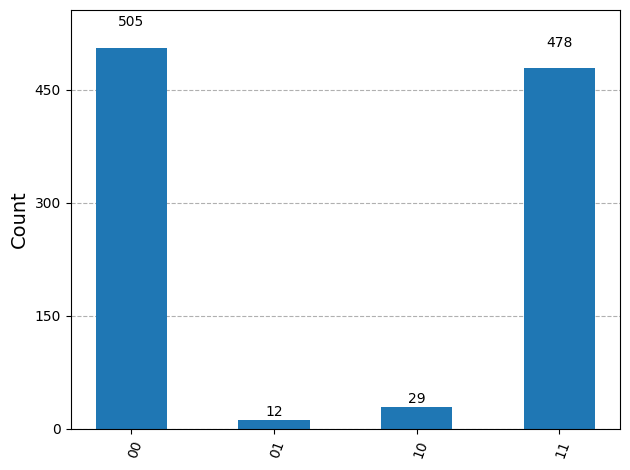

In [60]:
service = QiskitRuntimeService()
retrieved_job = service.job('d2qslhpolshc73bmin20')
result = retrieved_job.result()
counts = result[0].data.meas.get_counts() 
plot_histogram(counts)